In [2]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('附件.xlsx', sheet_name=0)
df1_valid = pd.read_excel('表1-填补缺失值.xlsx')
df2 = pd.read_excel('附件.xlsx', sheet_name=1)
df2_valid = pd.read_excel('文物样品信息汇总-填补缺失值.xlsx')
df3 = pd.read_excel('附件.xlsx', sheet_name=2)

In [3]:
df_whe = df2_valid[df2_valid.表面风化=='风化'].drop([23,25,29,30,44,45,48,53,56,60])
df_no_whe = pd.concat([df2_valid[df2_valid.表面风化=='无风化'],df2_valid.loc[[23,25,29,30,44,45,48,53,56,60]]]).sort_index()

In [4]:
Y_whe = df_whe.类型
Y_no_whe = df_no_whe.类型
X_whe = df_whe.drop(['文物编号','文物采样点','类型','表面风化','纹饰','颜色'],axis=1)
X_no_whe = df_no_whe.drop(['文物编号','文物采样点','类型','表面风化','纹饰','颜色'],axis=1)

In [45]:
from sklearn import tree
from sklearn.model_selection import train_test_split
Xtrain_whe, Xtest_whe, Ytrain_whe, Ytest_whe = train_test_split(X_whe, Y_whe, test_size=0.2,random_state=400)
Xtrain_no_whe, Xtest_no_whe, Ytrain_no_whe, Ytest_no_whe = train_test_split(X_no_whe, Y_no_whe, test_size=0.2,random_state=2022)

有风化，不排除铅钡尝试

In [46]:
clf_whe = tree.DecisionTreeClassifier(random_state=400).fit(Xtrain_whe, Ytrain_whe)
clf_whe.score(Xtest_whe,Ytest_whe)

1.0

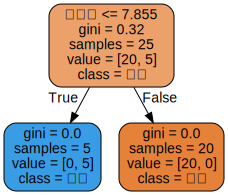

In [47]:
import graphviz
# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅','氧化钠','氧化钾','氧化钙','氧化镁','氧化铝','氧化铁','氧化铜','氧化铅','氧化钡','五氧化二磷','氧化锶','氧化锡','二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_whe
                                ,feature_names = feature_name
                                ,class_names=["铅钡","高钾"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

无风化，不排除铅尝试

In [48]:
clf_no_whe = tree.DecisionTreeClassifier().fit(Xtrain_no_whe, Ytrain_no_whe)
clf_no_whe.score(Xtest_no_whe,Ytest_no_whe)

1.0

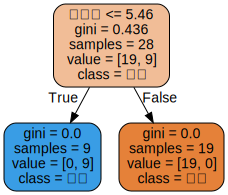

In [49]:
import graphviz
# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅','氧化钠','氧化钾','氧化钙','氧化镁','氧化铝','氧化铁','氧化铜','氧化铅','氧化钡','五氧化二磷','氧化锶','氧化锡','二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_no_whe
                                ,feature_names = feature_name
                                ,class_names=["铅钡","高钾"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

去除铅尝试

In [50]:
X_whe_dropPb = X_whe.drop('氧化铅(PbO)',axis=1)

In [51]:
Xtrain_whe_dropPb, Xtest_whe_dropPb, Ytrain_whe_dropPb, Ytest_whe_dropPb = train_test_split(X_whe_dropPb, Y_whe, test_size=0.2)

In [52]:
clf_whe_dropPb = tree.DecisionTreeClassifier().fit(Xtrain_whe_dropPb, Ytrain_whe_dropPb)
clf_whe_dropPb.score(Xtest_whe_dropPb, Ytest_whe_dropPb)

1.0

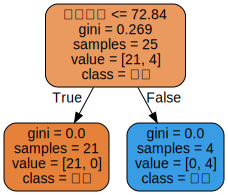

In [53]:
import graphviz

# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡', '二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_whe_dropPb
                                , feature_names=feature_name
                                , class_names=["铅钡", "高钾"]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [104]:
X_no_whe_dropPb = X_no_whe.drop('氧化铅(PbO)',axis=1)
Xtrain_no_whe_dropPb, Xtest_no_whe_dropPb, Ytrain_no_whe_dropPb, Ytest_no_whe_dropPb = train_test_split(X_no_whe_dropPb, Y_no_whe, test_size=0.2,random_state=800)

In [105]:
clf_no_whe_dropPb = tree.DecisionTreeClassifier(random_state=2022).fit(Xtrain_no_whe_dropPb, Ytrain_no_whe_dropPb)
clf_no_whe_dropPb.score(Xtest_no_whe_dropPb, Ytest_no_whe_dropPb)

1.0

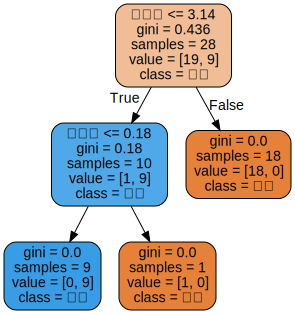

In [106]:
import graphviz

# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡', '二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_no_whe_dropPb
                                , feature_names=feature_name
                                , class_names=["铅钡", "高钾"]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

有风化，去除铅、二氧化硅

In [17]:
# X_whe_dropPb_dropSiO2 = X_no_whe_dropPb.drop('二氧化硅(SiO2)', axis=1)
# X_whe_dropPb_dropSiO2

In [18]:
# X_whe_dropPb_dropSiO2 = X_whe_dropPb.drop('二氧化硅(SiO2)', axis=1)
# Xtrain_whe_dropPb_dropSiO2, Xtest_whe_dropPb_dropSiO2, Ytrain_whe_dropPb_dropSiO2, Ytest_whe_dropPb_dropSiO2 = train_test_split(X_whe_dropPb_dropSiO2, Y_whe,test_size=0.2)
# clf_whe_dropPb_dropSiO2 = tree.DecisionTreeClassifier().fit(Xtrain_whe_dropPb_dropSiO2, Ytrain_whe_dropPb_dropSiO2)
# print(clf_whe_dropPb_dropSiO2.score(Xtest_whe_dropPb_dropSiO2, Ytest_whe_dropPb_dropSiO2))
# import graphviz
# # 这个特征名就是刚才英文翻译成中文了
# feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡']
# # filled：填充颜色，不纯度越低越深
# # rounded：圆角矩形
# dot_data = tree.export_graphviz(clf_whe_dropPb_dropSiO2
#                                 , feature_names=feature_name
#                                 , class_names=["铅钡", "高钾"]
#                                 , filled=True
#                                 , rounded=True
#                                 )
# graph = graphviz.Source(dot_data)
# graph

随机森林尝试

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
Xtrain_whe, Xtest_whe, Ytrain_whe, Ytest_whe = train_test_split(X_whe, Y_whe, test_size=0.2,random_state=400)
Xtrain_no_whe, Xtest_no_whe, Ytrain_no_whe, Ytest_no_whe = train_test_split(X_no_whe, Y_no_whe, test_size=0.2,random_state=300)
le1 = LabelEncoder().fit(Ytrain_whe)
rfr1 = RandomForestRegressor(random_state=2022, n_estimators=100)
rfr1 = rfr1.fit(Xtrain_whe, le1.transform(Ytrain_whe))
score1 = rfr1.score(Xtest_whe, le1.transform(Ytest_whe))
print(score1)
le12 = LabelEncoder().fit(Ytrain_no_whe)
rfr2 = RandomForestRegressor(random_state=2022, n_estimators=1000)
rfr2 = rfr2.fit(Xtrain_no_whe, le1.transform(Ytrain_no_whe))
score2 = rfr2.score(Xtest_no_whe, le1.transform(Ytest_no_whe))
print(score2)

0.9988333333333334
0.9999708333333334


In [102]:
pd.Series(rfr1.feature_importances_,index=X_whe.columns).sort_values(ascending=False)

氧化铅(PbO)       0.515152
二氧化硅(SiO2)     0.444444
氧化钡(BaO)       0.030303
氧化锶(SrO)       0.010101
氧化钠(Na2O)      0.000000
氧化钾(K2O)       0.000000
氧化钙(CaO)       0.000000
氧化镁(MgO)       0.000000
氧化铝(Al2O3)     0.000000
氧化铁(Fe2O3)     0.000000
氧化铜(CuO)       0.000000
五氧化二磷(P2O5)    0.000000
氧化锡(SnO2)      0.000000
二氧化硫(SO2)      0.000000
dtype: float64

In [103]:
pd.Series(rfr2.feature_importances_,index=X_no_whe.columns).sort_values(ascending=False)

氧化铅(PbO)       0.582
氧化钡(BaO)       0.257
氧化钾(K2O)       0.141
氧化钙(CaO)       0.015
氧化锶(SrO)       0.003
氧化铁(Fe2O3)     0.001
氧化铜(CuO)       0.001
二氧化硅(SiO2)     0.000
氧化钠(Na2O)      0.000
氧化镁(MgO)       0.000
氧化铝(Al2O3)     0.000
五氧化二磷(P2O5)    0.000
氧化锡(SnO2)      0.000
二氧化硫(SO2)      0.000
dtype: float64

高钾聚类

In [255]:
df2_k_cc = df2_valid[df2_valid.类型=='高钾'].drop(['文物编号','文物采样点','纹饰','类型','颜色','表面风化'],axis=1)
df2_k_cc.iloc[1] = df2_k_cc.iloc[1:3].mean()
df2_k_cc.iloc[5] = df2_k_cc.iloc[5:7].mean()
df2_k_cc = df2_k_cc.drop([3,7])
df2_k_cc

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.990,6.320,0.870,3.93,1.740,3.870,0.000,0.000,1.17,0.000,0.00,0.39
2,74.38,0.00,8.780,3.940,0.555,4.78,1.080,2.935,0.830,1.430,0.68,0.050,0.00,0.00
4,65.88,0.00,9.670,7.120,1.560,6.44,2.060,2.180,0.000,0.000,0.79,0.000,0.00,0.36
5,61.58,0.00,10.950,7.350,1.770,7.50,2.620,3.270,0.000,0.000,0.94,0.060,0.00,0.47
6,63.73,0.00,7.525,2.705,1.855,10.60,4.215,2.345,0.275,1.175,4.34,0.115,0.00,0.00
8,92.63,0.00,0.000,1.070,0.000,1.98,0.170,3.240,0.000,0.000,0.61,0.000,0.00,0.00
11,95.02,0.00,0.590,0.620,0.000,1.32,0.320,1.550,0.000,0.000,0.35,0.000,0.00,0.00
12,96.77,0.00,0.920,0.210,0.000,0.81,0.260,0.840,0.000,0.000,0.00,0.000,0.00,0.00
14,94.29,0.00,1.010,0.720,0.000,1.46,0.290,1.650,0.000,0.000,0.15,0.000,0.00,0.00
15,59.01,2.86,12.530,8.700,0.000,6.16,2.880,4.730,0.000,0.000,1.27,0.000,0.00,0.00


In [256]:
(df2_k_cc.std() / df2_k_cc.mean()).sort_values(ascending=False)

氧化锡(SnO2)      4.000000
氧化钡(BaO)       2.211546
氧化钠(Na2O)      2.196721
二氧化硫(SO2)      2.167111
氧化铅(PbO)       2.010075
氧化锶(SrO)       1.691355
五氧化二磷(P2O5)    1.232203
氧化铁(Fe2O3)     1.042379
氧化镁(MgO)       0.914034
氧化钾(K2O)       0.881359
氧化钙(CaO)       0.841936
氧化铜(CuO)       0.649942
氧化铝(Al2O3)     0.614862
二氧化硅(SiO2)     0.182862
dtype: float64

In [257]:
df2_k_cc_cluster = df2_k_cc[['氧化锡(SnO2)','氧化钡(BaO)','氧化钠(Na2O)','二氧化硫(SO2)','氧化铅(PbO)', '氧化锶(SrO)']]
df2_k_cc_cluster

,氧化锡(SnO2),氧化钡(BaO),氧化钠(Na2O),二氧化硫(SO2),氧化铅(PbO),氧化锶(SrO)
0,0.00,0.000,0.00,0.39,0.000,0.000
2,0.00,1.430,0.00,0.00,0.830,0.050
4,0.00,0.000,0.00,0.36,0.000,0.000
5,0.00,0.000,0.00,0.47,0.000,0.060
6,0.00,1.175,0.00,0.00,0.275,0.115
8,0.00,0.000,0.00,0.00,0.000,0.000
11,0.00,0.000,0.00,0.00,0.000,0.000
12,0.00,0.000,0.00,0.00,0.000,0.000
14,0.00,0.000,0.00,0.00,0.000,0.000
15,0.00,0.000,2.86,0.00,0.000,0.000


D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6249789990616722


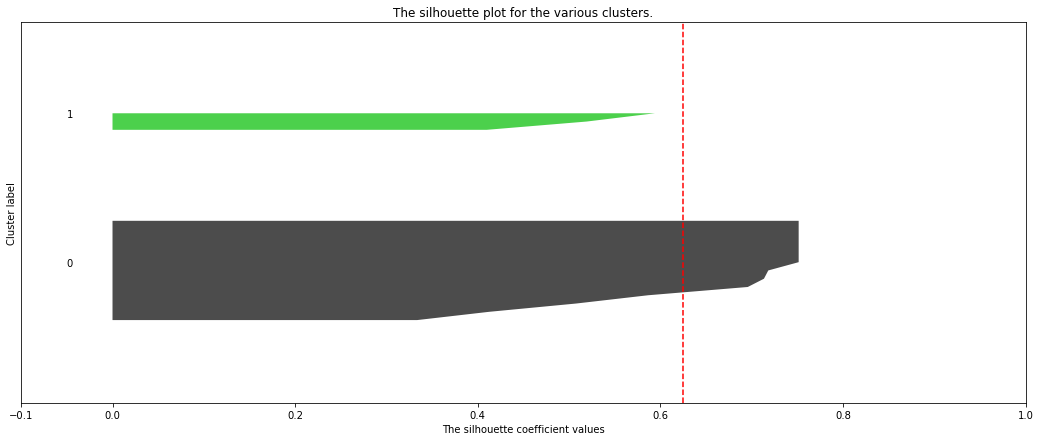

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6247985602444119


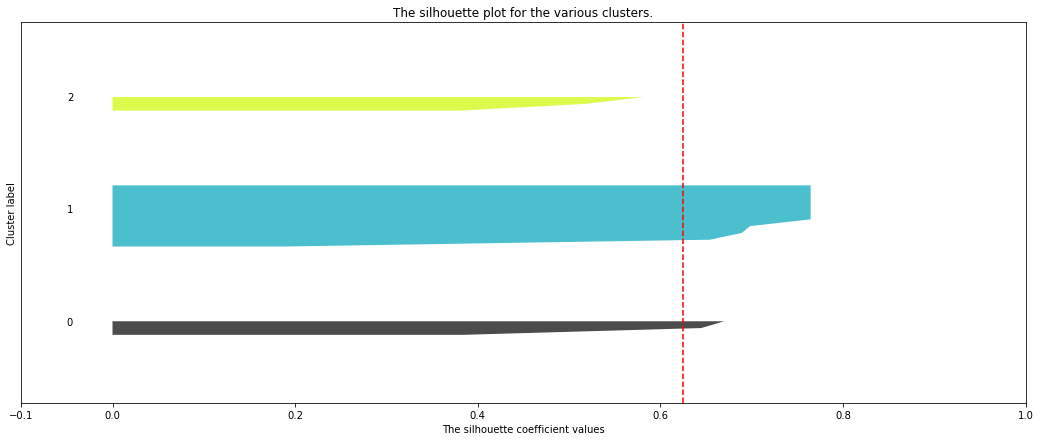

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6820136375394079


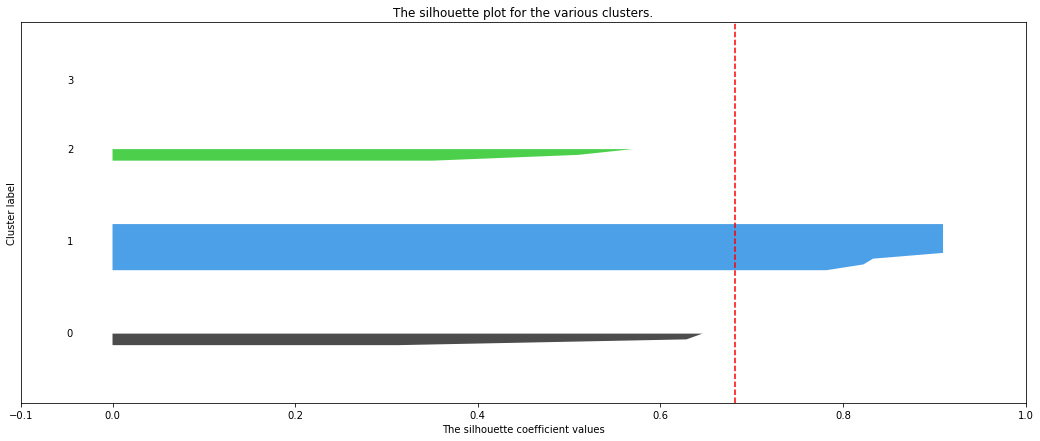

In [258]:
# 包装成一个大循环
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

X_k = df2_k_cc_cluster
for n_clusters in [2,3,4]:
    n_clusters = n_clusters
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X_k.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=2022).fit(X_k)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X_k, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_k, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [265]:
clusterer = KMeans(n_clusters=3, random_state=2022).fit(X_k)
k_cluster_res = clusterer.labels_
k_cluster_res

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1])

In [266]:
k_cluster_res = list(k_cluster_res)
k_cluster_res.insert(1,k_cluster_res[1])
k_cluster_res.insert(5,k_cluster_res[5])

18

In [284]:
# 输出结果
k_cluster_info_all = df2_valid[df2_valid.类型=='高钾']
k_cluster_info_all['亚类标号'] = k_cluster_res
k_cluster_info_all.to_excel('高钾亚类划分结果.xlsx',index=False)

C:\Windows\Temp\ipykernel_6212\3739380855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_cluster_info_all['亚类标号'] = k_cluster_res


铅钡分析

In [276]:
df2_pb_cc = df2_valid[df2_valid.类型 == '铅钡'].drop(['文物编号', '文物采样点', '纹饰', '类型', '颜色', '表面风化'], axis=1)
# df2_k_cc.iloc[1] = df2_k_cc.iloc[1:3].mean()
# df2_k_cc.iloc[5] = df2_k_cc.iloc[5:7].mean()
# df2_k_cc = df2_k_cc.drop([3, 7])
df2_pb_cc

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
9,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
10,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03
13,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
19,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
23,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,11.86,0.00,0.33,0.00,0.00
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
25,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,6.65,0.19,0.20,0.00,0.00
26,3.72,0.00,0.40,3.01,0.00,1.18,0.00,3.60,29.92,35.45,6.04,0.62,0.00,15.95


In [277]:
df2_pb_cc.iloc[13] = df2_pb_cc.iloc[13:15].mean()
df2_pb_cc.iloc[15] = df2_pb_cc.iloc[25:27].mean()
df2_pb_cc.iloc[27] = df2_pb_cc.iloc[27:29].mean()
df2_pb_cc.iloc[38] = df2_pb_cc.iloc[38:40].mean()
df2_pb_cc = df2_pb_cc.drop([32,45,47,58])
df2_pb_cc

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,36.280,0.00,1.050,2.340,1.180,5.730,1.860,0.260,47.430,0.00,3.570,0.190,0.000,0.00
9,20.140,0.00,0.000,1.480,0.000,1.340,0.000,10.410,28.680,31.23,3.590,0.370,0.000,2.58
10,4.610,0.00,0.000,3.190,0.000,1.110,0.000,3.140,32.450,30.62,7.560,0.530,0.000,15.03
13,33.590,0.00,0.210,3.510,0.710,2.690,0.000,4.930,25.390,14.61,9.380,0.370,0.000,0.00
19,29.640,0.00,0.000,2.930,0.590,3.570,1.330,3.510,42.820,5.35,8.830,0.190,0.000,0.00
20,37.360,0.00,0.710,0.000,0.000,5.450,1.510,4.780,9.300,23.55,5.750,0.000,0.000,0.00
23,53.790,7.92,0.000,0.500,0.710,1.420,0.000,2.990,16.980,11.86,0.000,0.330,0.000,0.00
24,31.940,0.00,0.000,0.470,0.000,1.590,0.000,8.460,29.140,26.23,0.140,0.910,0.000,0.00
25,50.610,2.31,0.000,0.630,0.000,1.900,1.550,1.120,31.900,6.65,0.190,0.200,0.000,0.00
26,3.720,0.00,0.400,3.010,0.000,1.180,0.000,3.600,29.920,35.45,6.040,0.620,0.000,15.95


In [278]:
(df2_pb_cc.std() / df2_pb_cc.mean()).sort_values(ascending=False)

二氧化硫(SO2)      3.754133
氧化锡(SnO2)      3.656891
氧化钠(Na2O)      1.901705
氧化铁(Fe2O3)     1.296793
氧化铜(CuO)       1.292576
氧化钾(K2O)       1.286254
五氧化二磷(P2O5)    1.168046
氧化镁(MgO)       1.045364
氧化铝(Al2O3)     0.840682
氧化钙(CaO)       0.767426
氧化锶(SrO)       0.764366
氧化钡(BaO)       0.757424
二氧化硅(SiO2)     0.482071
氧化铅(PbO)       0.448937
dtype: float64

In [279]:
df2_pb_cc_cluster = df2_pb_cc[['二氧化硫(SO2)', '氧化锡(SnO2)', '氧化钠(Na2O)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化钾(K2O)']]
df2_pb_cc_cluster

,二氧化硫(SO2),氧化锡(SnO2),氧化钠(Na2O),氧化铁(Fe2O3),氧化铜(CuO),氧化钾(K2O)
1,0.00,0.000,0.00,1.860,0.260,1.050
9,2.58,0.000,0.00,0.000,10.410,0.000
10,15.03,0.000,0.00,0.000,3.140,0.000
13,0.00,0.000,0.00,0.000,4.930,0.210
19,0.00,0.000,0.00,1.330,3.510,0.000
20,0.00,0.000,0.00,1.510,4.780,0.710
23,0.00,0.000,7.92,0.000,2.990,0.000
24,0.00,0.000,0.00,0.000,8.460,0.000
25,0.00,0.000,2.31,1.550,1.120,0.000
26,15.95,0.000,0.00,0.000,3.600,0.400


D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.765160255365507


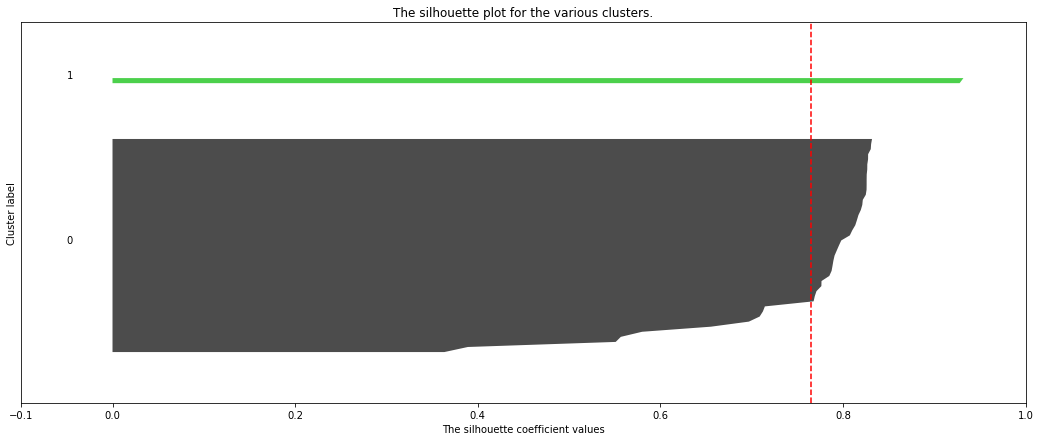

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5917946674806078


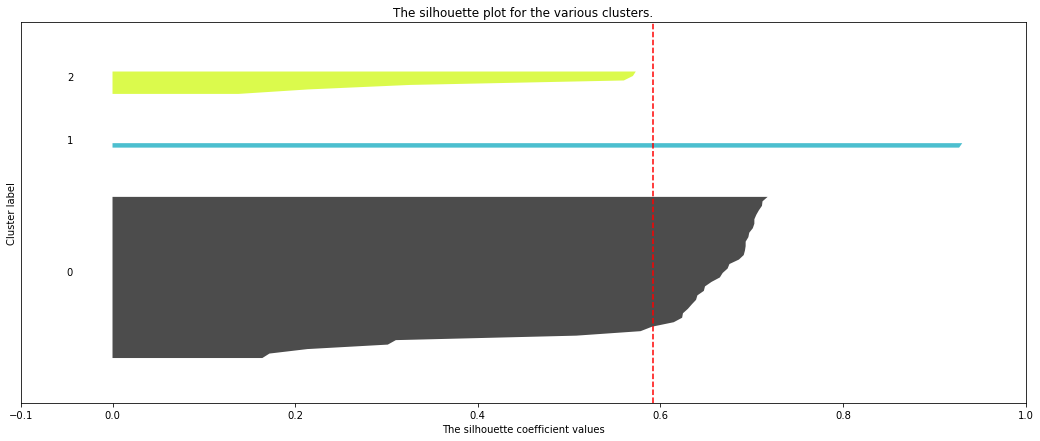

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.491859302043744


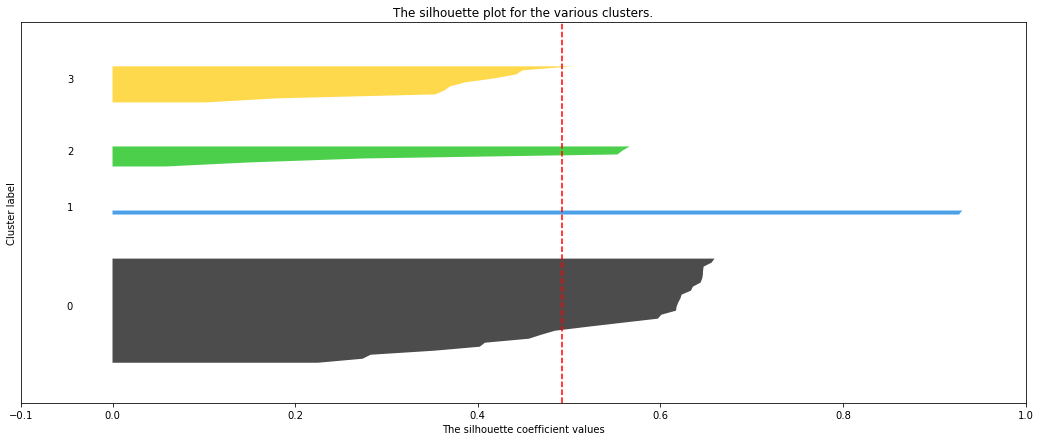

In [280]:
# 包装成一个大循环
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

X_pb = df2_pb_cc_cluster
for n_clusters in [2, 3, 4]:
    n_clusters = n_clusters
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X_pb.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=2022).fit(X_pb)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X_pb, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_pb, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          , ith_cluster_silhouette_values
                          , facecolor=color
                          , alpha=0.7
                          )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [281]:
clusterer = KMeans(n_clusters=3, random_state=2022).fit(X_pb)
pb_cluster_res = clusterer.labels_

D:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [282]:
pb_cluster_res = list(pb_cluster_res)
pb_cluster_res.insert(13,pb_cluster_res[13])
pb_cluster_res.insert(15,pb_cluster_res[15])
pb_cluster_res.insert(27,pb_cluster_res[27])
pb_cluster_res.insert(38,pb_cluster_res[38])
pb_cluster_res

[0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [286]:
# 输出结果
pb_cluster_info_all = df2_valid[df2_valid.类型=='铅钡']
pb_cluster_info_all['亚类标号'] = pb_cluster_res
pb_cluster_info_all.to_excel('铅钡亚类划分结果.xlsx',index=False)

C:\Windows\Temp\ipykernel_6212\937272079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb_cluster_info_all['亚类标号'] = pb_cluster_res
